# <font size=6 id='modeling'>**MODELISATION**</font>

In [1]:
#Basic Librairies
import numpy as np
import pandas as pd
import pickle

Let's load data 

In [2]:
# Load X_train
X_train = pd.read_pickle("Data/X_train.pkl")
# Load y_train
y_train = pd.read_pickle("Data/y_train.pkl")
# Load X_valid
X_valid = pd.read_pickle("Data/X_valid.pkl")
# Load y_valid
y_valid = pd.read_pickle("Data/y_valid.pkl")

In [3]:
print(" Dimension of the data: \n","-"*33)
print(" The shape of X_train = {} \n The shape of y_train = {} \n The shape of X_valid = {} \n The shape of y_valid = {}".format(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape))

 Dimension of the data: 
 ---------------------------------
 The shape of X_train = (7736, 14) 
 The shape of y_train = (7736,) 
 The shape of X_valid = (1934, 14) 
 The shape of y_valid = (1934,)


In [4]:
import warnings
warnings.filterwarnings("ignore")

ARIMA (AutoRegressive Integrated Moving Average) is a time series model that combines auto-regression (AR) and moving average (MA). ARIMA is used to model stationary time series or non-stationary time series which can be transformed into stationary series by differentiating the time series at a given time.

The ARIMA model is characterized by three main parameters: p, d and q.

p: order of auto-regression (number of lags used as predictors)

d: order of differentiation (number of times the series must be differentiated to become stationary)

q: order of the moving average (number of lags of the error in the prediction)


The ARIMA modeling process typically involves selecting these parameters and estimating model coefficients from time series data. This can be done manually or using automatic methods such as grid search or automated pattern search (e.g. with the pmdarima library in Python).

In [5]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(X_train['type_code'], n_fits=20, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10884.882, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10876.902, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10878.902, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10878.902, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10874.968, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10503.275, Time=1.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10385.144, Time=1.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10880.882, Time=0.66 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10884.873, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10882.882, Time=0.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10882.873, Time=1.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10094.281, Time=2.99 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10071.937, Time=4.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9623.949, Time=3.25 sec
 ARIMA(4,1,0)(0,0,0)

The code uses the pmdarima library to automatically fit an ARIMA time series forecast model on the "type_code" column of the X_train training data.

The "auto_arima" function automatically selects the best ARIMA model using advanced regression method based on grid search and akaike criterion information (AIC) and bayes criteria (BIC).

In [6]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7736
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2563.094
Date:                Thu, 06 Apr 2023   AIC                           5150.187
Time:                        22:00:09   BIC                           5233.630
Sample:                             0   HQIC                          5178.797
                               - 7736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0027      0.006      0.467      0.640      -0.008       0.014
ar.L1          0.3263      0.016     20.520      0.000       0.295       0.357
ar.L2         -0.1935      0.017    -11.491      0.000      -0.226      -0.160
ar.L3          0.0912      0.023      3.957      0.000       0.046       0.136
ar.L4          0.0286      0.024      1.188      0.235      -0.019       0.076
ar.L5         -0.8407      0.019    -45.130      0.000      -0.877      -0.804
ma.L1         -0.5828      0.016    -36.134      0.000      -0.614      -0.551
ma.L2          0.3741      0.021     17.404      0.000       0.332       0.416
ma.L3         -0.2272      0.020    -11.644      0.000      -0.265      -0.189
ma.L4          0.0653      0.017      3.826      0.000       0.032       0.099
ma.L5          0.5136      0.015     34.055      0.000       0.484       0.543
sigma2         0.1139      0.000    535.451      0.000       0.113       0.114
===================================================================================
Ljung-Box (L1) (Q):                   5.33   Jarque-Bera (JB):          43731855.52
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                           -11.61
Prob(H) (two-sided):                  0.89   Kurtosis:                       370.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Train Model**

<p>In this part, we will set up models that will solve our problem which is here the detection of IP packet errors in a 4G and 5G network.</p>
<p>As you may have noticed earlier, we prepared our data with timeseriesgenerator because we are going to use LSTM and ARIMA to make predictions.</p>
<p><strong><i>Why LSTM and ARIMA?</i></strong> Actually it's because we work with complex temporal data and we need to be able to capture footage and remember previous days to make good predictions. LSTM is suitable for this task, and ARIMA is a classical time series model that can capture complex patterns and trends.</p>
<p>Also we will set up several templates for:</p>
<ul>
    <li>Classify the states of our network using LSTM</li>
    <li>Detect anomalies that are errors using ARIMA</li>
    <li>Predicting latency states using LSTM and ARIMA</li>
    <li>Predict if our network is congested using XGBOOST</li>
</ul>
<p>We will use a combination of Machine Learning and time series models for our problem to ensure the best possible results.</p>

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections.

<img src="Plot/LSTM_Cell.svg.png" alt="LSTM" style="width: 60%; height: auto;">

### Classify state of the network

**model SARIMAX**

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Créer un modèle SARIMAX avec les meilleurs hyperparamètres
model = SARIMAX(y_train, order=(5, 1, 5), seasonal_order=(0, 0, 0, 0))

# Entraîner le modèle sur les données d'entraînement
model_fit = model.fit()

# Faire des prédictions sur les données de validation
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_valid)-1) 

/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/env_tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

In [14]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              type_code   No. Observations:                 7736
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2566.589
Date:                Thu, 06 Apr 2023   AIC                           5155.179
Time:                        22:05:39   BIC                           5231.667
Sample:                             0   HQIC                          5181.404
                               - 7736                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3104      0.014     21.763      0.000       0.282       0.338
ar.L2         -0.1698      0.015    -11.378      0.000      -0.199      -0.141
ar.L3          0.0663      0.020      3.296      0.0

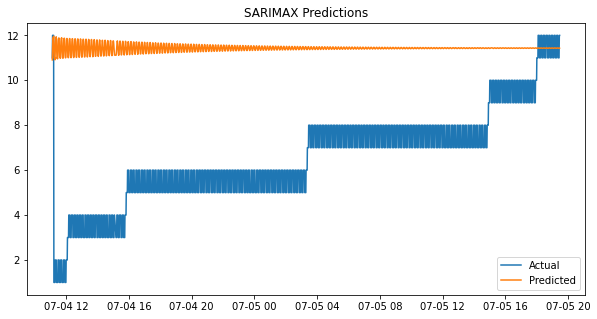

In [15]:
# Afficher les prédictions et les valeurs réelles
plt.figure(figsize=(10, 5))
plt.plot(y_valid.index, y_valid.values, label='Actual')
plt.plot(y_valid.index, y_pred, label='Predicted')
plt.legend()
plt.title('SARIMAX Predictions')
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer les scores
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

# Afficher les scores
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Mean Absolute Error (MAE):  4.901257594719443
Mean Squared Error (MSE):  28.499368571426427
Root Mean Squared Error (RMSE):  5.3384799869837885


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)

In [9]:
# Créer le modèle ARIMA
model = ARIMA(y_train_encoded, order=(5, 1, 0))
model_fit = model.fit()

# Faire des prédictions sur les données de validation
y_pred = model_fit.predict(start=len(y_train_encoded), end=len(y_train_encoded) + len(y_valid_encoded) - 1)

# Convertir les prédictions en classes
y_pred_class = le.inverse_transform(y_pred.round().astype(int))

In [10]:
# Faire des prédictions sur les données de validation
y_pred = model.predict(start=len(X_train), end=len(X_train)+len(X_valid)-1)

# Afficher les prédictions et les valeurs réelles
plt.figure(figsize=(10, 5))
plt.plot(y_valid.values, label='Valeurs réelles')
plt.plot(y_pred, label='Prédictions')
plt.legend()
plt.show()


TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
model = ARIMA(X_train['type_code'], order=(5,1,5))
model_fit = model.fit()
model_fit.summary()

In [ ]:
#Prediction on test
start=len(X_train)
end=len(X_train)+len(X_valid)-1
pred=model_fit.predict(start=start, end=end, typ='levels')
print(pred)

In [ ]:
pred.plot(legend=True)
X_valid['type_code'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,X_valid['type_code']))
print(rmse)

In [ ]:
#Create model
model = Sequential()
model.add(LSTM(64, input_shape=(n_input, n_features)))
#model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))
#model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
#model.add(LSTM(32, return_sequences=False))

In [ ]:
#Summary of the model
model.summary()

<p>The Adam optimization algorithm is used for the formation of deep learning models. This is an extension of the stochastic gradient descent. In this optimization algorithm, the current averages of gradients and second moments of gradients are used. It is used to calculate adaptive learning rates for each parameter.</p>
<p>The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster</p>

In [ ]:
#Compile the model
opt_rms=RMSprop(lr=0.005)
learning_rate = 0.001
opt_adam = Adam(lr=learning_rate)
model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# define early stopping callback
#early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# train the model
history = model.fit(train_generator, epochs=150, validation_data=valid_generator, verbose=1, batch_size=batch_size)

In [ ]:
#Evaluation of train and test
train_loss, train_accuracy = model.evaluate(train_generator, batch_size=batch_size)
test_loss, test_accuracy = model.evaluate(valid_generator, batch_size=batch_size)

#Print the Accuracy
print("Score of the train (loss) : {:.4f}".format(train_loss))
print("Accuracy of the train (accuracy) : {:.4f} %".format(train_accuracy*100))
print("Score of the test (loss) : {:.4f}".format(test_loss))
print("Accuracy of the test (accuracy) : {:.4f} %".format(test_accuracy*100))